# Project inferential Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.





### Import all the necessary libraries

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
# complete the code below to load the dataset
df = pd.read_csv('/content/drive/MyDrive/(IS) Guided Project/abtest.csv')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [20]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [21]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [22]:
# view the shape of the dataset
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [23]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [24]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Getting the statistical summary for the categorical variables

In [25]:
print(df.describe(include=['O']))

          group landing_page converted language_preferred
count       100          100       100                100
unique        2            2         2                  3
top     control          old       yes            Spanish
freq         50           50        54                 34


### Check for missing values

In [26]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


### Check for duplicates

In [27]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


### Univariate Analysis

#### Time spent on the page

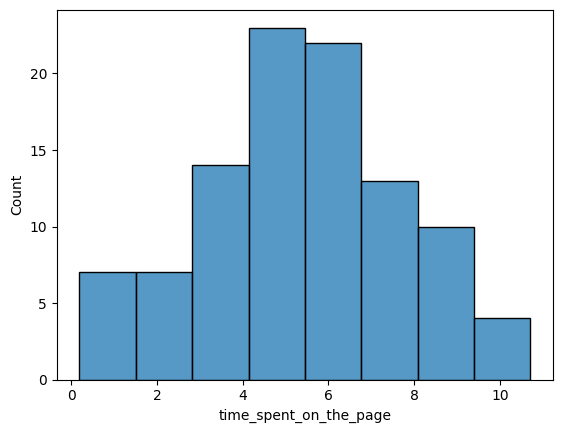

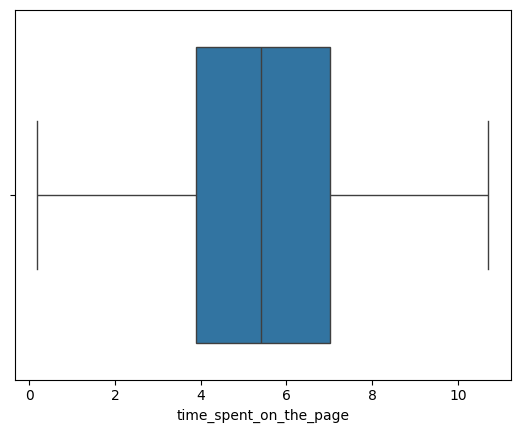

In [28]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Group

In [29]:
df['group'].value_counts()

,count
group,
control,50
treatment,50


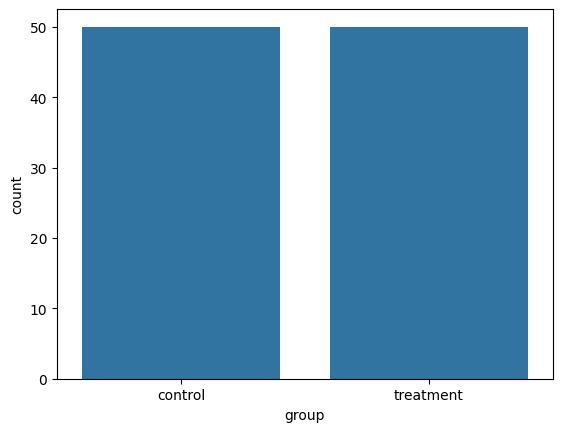

In [30]:
sns.countplot(data=df,x='group')
plt.show()

#### Landing page

In [31]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


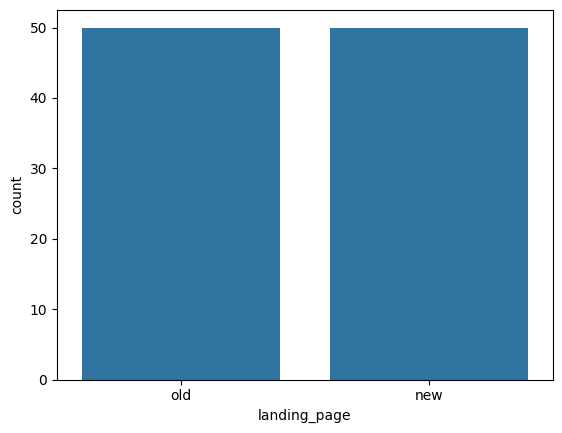

In [32]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [33]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


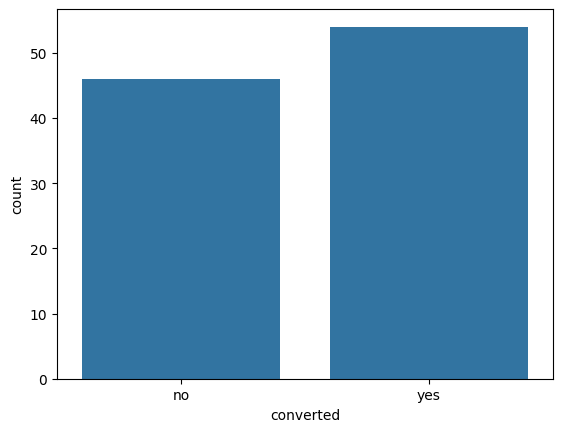

In [34]:
# complete the code to plot the countplot
sns.countplot(data=df,x='converted')
plt.show()

#### Language preferred

In [35]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


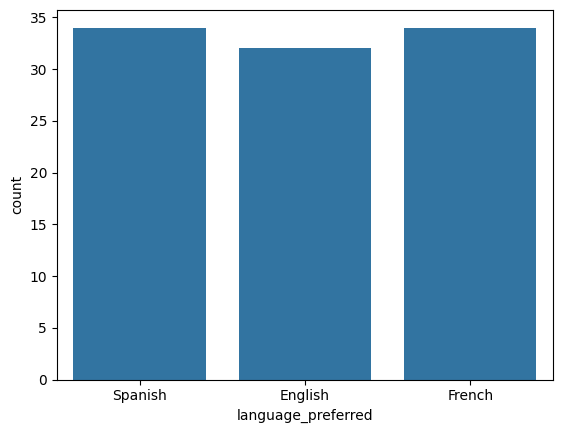

In [36]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

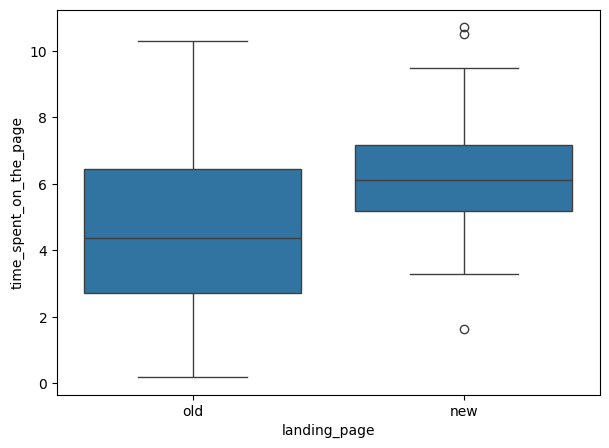

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Conversion status vs Time spent on the page

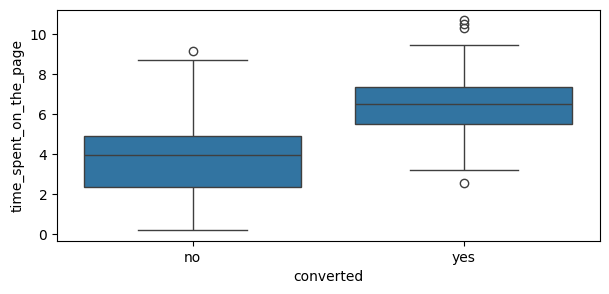

In [38]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(7, 3))
sns.boxplot(data = df, x = 'converted', y ='time_spent_on_the_page')
plt.show()

#### Language preferred vs Time spent on the page

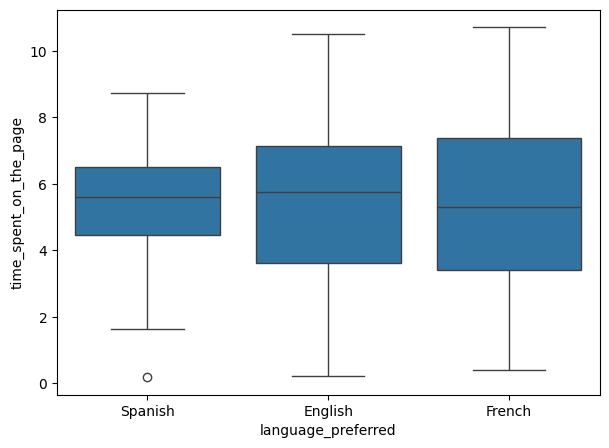

In [39]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(7, 5))
sns.boxplot(data = df, x ='language_preferred', y ='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

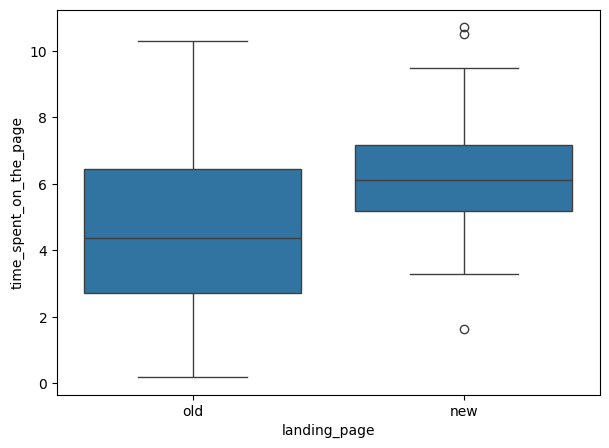

In [40]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(7,5))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H₀): There is no difference in the average time spent on the old and new landing pages (i.e., the mean time spent on both pages is equal).

𝐻
0
:
𝜇
old
=
𝜇
new


Alternate Hypothesis (H₁ or Ha): There is a difference in the average time spent on the old and new landing pages (i.e., the mean time spent is not equal).

𝐻
𝑎
:
𝜇
old
≠
𝜇
new






### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [41]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [42]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [43]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative ='greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [44]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

**Inference:**



 Based on the results of the statistical test, there is strong evidence to suggest that there is a significant difference in the average time spent on the old and new landing pages. The p-value of approximately 0.00014 is much lower than the significance level of
𝛼
=
0.05
α=0.05, indicating that the difference in means is statistically significant.

This implies that the new landing page either performs better or worse than the old one regarding the average time spent by users. Further analysis may be required to understand the nature and impact of this difference on user engagement and overall performance.



**Summary of Findings:**

Null Hypothesis (H₀): There is no difference in average time spent on old and new landing pages. (Rejected)

Alternate Hypothesis (H₁): There is a difference in average time spent on old and new landing pages. (Accepted)

Conclusion: The new landing page significantly affects the time spent by users compared to the old page.


## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

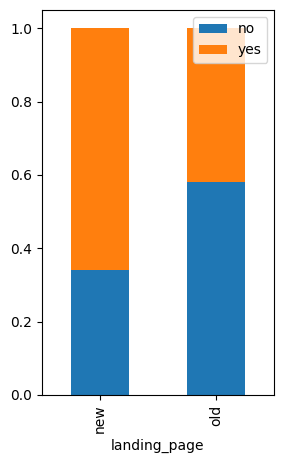

In [45]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(3,5),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

**Null Hypothesis (H₀):** There is no difference in the conversion rates between the old and new landing pages.

𝐻
0
:
𝑝
old
=
𝑝
new



This implies that the proportion of users who convert after visiting the old landing page is equal to the proportion of users who convert after visiting the new landing page.



**Alternate Hypothesis (H₁ or Ha):** There is a difference in the conversion rates between the old and new landing pages.

𝐻
𝑎
:
𝑝
old
≠
𝑝
new




This indicates that the proportion of users who convert after visiting the old landing page is not equal to the proportion of users who convert after visiting the new landing page.



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [46]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [47]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='two-sided')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [48]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

**Inference:**

Based on the results of the hypothesis test, we can conclude the following:

1. Statistical Significance: The p-value obtained from the two-proportion z-test

 is approximately 0.0161, which is less than the chosen significance level of
𝛼
=
0.05
α=0.05. This indicates that the difference in conversion rates between the old and new landing pages is statistically significant.

2. Rejecting the Null Hypothesis: Given that the p-value is less than the significance level, we reject the null hypothesis (
𝐻
0
:
𝑝
old
=
𝑝
new
H
0
​
 :p
old
​
 =p
new
​
 ). This provides strong evidence that the conversion rates of the two landing pages are not equal.

3. Practical Implication: Since we have evidence of a difference in conversion rates, further analysis is needed to determine the direction of this difference:

 * If the number of conversions on the new landing page is greater than on the old landing page, we can conclude that the new landing page is more effective in converting users.

 * Conversely, if the conversions on the old landing page are higher, it suggests that the old page is more effective.

**Conclusion:**  The analysis indicates that there is a significant difference in user behavior regarding conversions between the old and new landing pages. This insight should guide future decisions regarding website optimization and user experience strategies.

Summary:

 p-value:0.0161

 Decision: Reject the null hypothesis.

 Inference: There is a statistically significant difference in conversion rates between the new and old landing pages, warranting further investigation into the effectiveness of each page.



## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

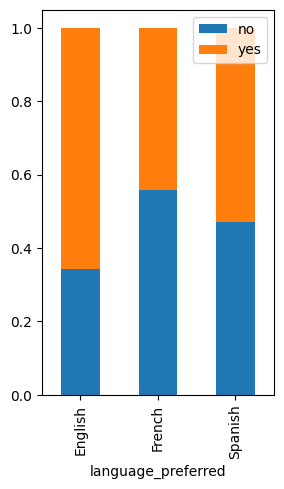

In [49]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(3,5), stacked=True)
plt.legend()
plt.show()


### Step 1: Define the null and alternate hypotheses

**Null Hypothesis (H₀):**

 * The null hypothesis states that there is no relationship between the conversion status and the preferred language. In other words, the conversion rates for different preferred languages are equal.


* This implies that the proportion of users who convert after visiting the landing page is the same regardless of their preferred language.

**Alternate Hypothesis (H₁ or Ha):**

* The alternate hypothesis states that there is a relationship between the conversion status and the preferred language. This means that the conversion rates for different preferred languages are not equal.


* This indicates that the proportion of users who convert after visiting the landing page varies based on their preferred language.

**Summary**

**H₀:** There is no difference in conversion rates among users of different preferred languages.

**H₁:** There is a difference in conversion rates among users of different preferred languages.



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [50]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [51]:
# complete the code to import the required function
from scipy.stats import chi2_contingency

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [52]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

**Inference:**  
 Based on the Chi-square test of independence conducted to assess the relationship between converted status (converted vs. not converted) and preferred language (English, French, Spanish), we found a p-value of 0.2129. Given that this p-value is greater than our significance level of α = 0.05, we fail to reject the null hypothesis.

**Conclusion:**  
This implies that there is insufficient evidence to suggest a significant association between the converted status and the preferred language. In other words, the preferred language does not appear to have a statistically significant effect on the likelihood of conversion in this dataset. Thus, we conclude that the two categorical variables are independent of each other in the context of this analysis.



## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [53]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

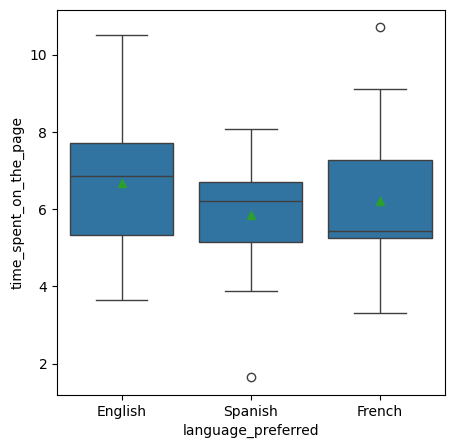

In [54]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(5,5))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


In [55]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


### Step 1: Define the null and alternate hypotheses

Null Hypothesis (
𝐻
0
):   There is no difference in the mean time spent on the new page among users of different languages.



Alternative Hypothesis (
𝐻
𝑎
):  There is a difference in the mean time spent on the new page among users of different languages.                                                                     

**Explanation:**

The null hypothesis states that the mean times for all language groups are equal, indicating that language preference does not affect the time spent on the new page.

The alternative hypothesis posits that at least one language group has a different mean time spent, suggesting that language preference may influence user behavior.



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [56]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   # complete your code here

### Step 5: Calculate the p-value

In [57]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [58]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

**Inference:**

 In our analysis of the time spent on the new page across three language user groups (English, French, and Spanish), we performed a one-way ANOVA test to determine if there were significant differences in the mean time spent among these groups. The calculated p-value was 0.4320.

**Conclusion**:

 Since the p-value of 0.4320 is greater than our chosen significance level of α = 0.05, we fail to reject the null hypothesis. This implies that there is insufficient evidence to conclude that the mean time spent on the new page differs significantly among users of different languages.

**Final Statement**:

 Thus, we conclude that language preference does not have a statistically significant effect on the amount of time users spend on the new page in this dataset. All three groups appear to have similar mean times spent on the new page.



## Conclusion and Business Recommendations


**Conclusion**
1. Mean Time Analysis:

* The average time spent on the new page was found to be highest among English users (6.66 seconds), followed by French users (6.20 seconds), and Spanish users (5.84 seconds). This suggests variations in user engagement levels based on language preference.
2. Statistical Significance:

* The one-way ANOVA test yielded a p-value of 0.4320, which is greater than the significance level of α = 0.05. Therefore, we failed to reject the null hypothesis, concluding that there are no statistically significant differences in the mean time spent on the new page across the three language groups.

**Business Recommendations**
1.  User Engagement Strategy:

* Given that English users spent the most time on the new page, consider enhancing content specifically for English-speaking users to maintain their engagement. This could include more interactive elements, personalized content, or targeted marketing strategies.
2. Content Localization:

* Although the time spent by French and Spanish users is lower, it may be beneficial to investigate whether content localization could improve engagement. Tailoring content to better meet the cultural and linguistic needs of these users could enhance their experience and increase time spent on the page.
3. Further Research:

* Conduct qualitative research (such as user interviews or surveys) to understand why users from different language backgrounds are engaging differently. This insight can help refine user experience strategies and address specific needs of non-English speakers.
4. Monitor User Behavior:

* Implement tracking and analytics tools to continuously monitor user behavior over time. Observing trends in how language preferences influence engagement can inform future strategies and adjustments.
5. A/B Testing:

* Consider running A/B tests for different language user segments to experiment with various page designs or content types. This could reveal more nuanced insights about user preferences and engagement.

**Summary**

 In summary, while there is currently no statistically significant difference in the time spent on the new page among different language users, the observed differences in means warrant attention. By tailoring content and engagement strategies to the needs of various language groups, the business can potentially improve user engagement and overall satisfaction. Further investigation into user behavior and preferences will be essential for optimizing the user experience across all language segments.

___